In [15]:
#  Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA



df = pd.read_csv("sales_sample.csv")

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df.asfreq('MS')

print(df.head())


            sales
date             
2019-01-01   5149
2019-02-01   5215
2019-03-01   5653
2019-04-01   6026
2019-05-01   5502


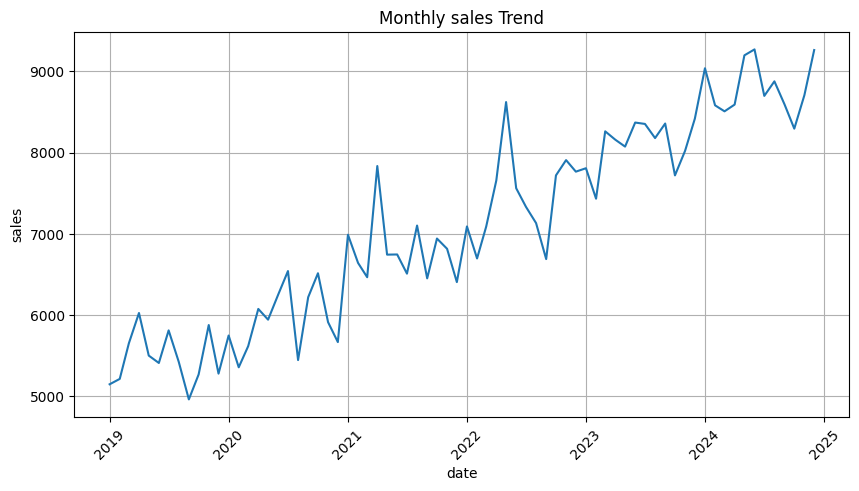

In [9]:
plt.figure(figsize=(10,5))
plt.plot(df['sales'])
plt.title("Monthly sales Trend")
plt.xlabel("date")
plt.ylabel("sales")
plt.xticks(rotation=45)  # rotate x-axis labels
plt.grid(True)
plt.show()


In [10]:
model = ARIMA(df['sales'], order=(5,1,2))
model_fit = model.fit()
df = df.asfreq('MS')
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   72
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -534.266
Date:                Tue, 18 Nov 2025   AIC                           1084.532
Time:                        16:39:38   BIC                           1102.633
Sample:                    01-01-2019   HQIC                          1091.730
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2663      0.163     -1.639      0.101      -0.585       0.052
ar.L2         -1.1025      0.156     -7.045      0.000      -1.409      -0.796
ar.L3         -0.4079      0.190     -2.144      0.0

C:\Users\sayed\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
forecast = model_fit.forecast(steps=6)
print("Next 6 Months Forecast:")
print(forecast)


Next 6 Months Forecast:
2025-01-01    8637.921529
2025-02-01    8694.016593
2025-03-01    9017.635460
2025-04-01    8846.276741
2025-05-01    8682.520396
2025-06-01    8847.267713
Freq: MS, Name: predicted_mean, dtype: float64


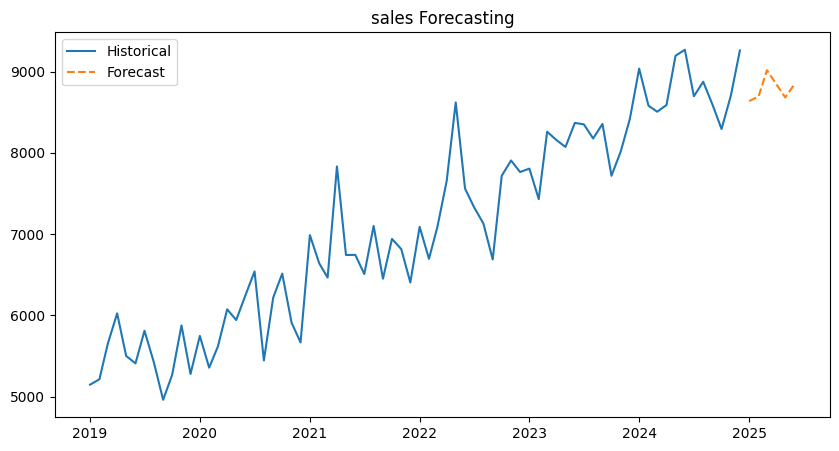

In [12]:
import matplotlib.dates as mdates
plt.figure(figsize=(10,5))
plt.plot(df['sales'], label="Historical")
plt.plot(forecast, label="Forecast", linestyle="--")
plt.title("sales Forecasting")
plt.legend()
plt.show()
